### 一 、特征提取部分
#### 1. 提取全部特征
#### 2. 保存全部特征

### 二 、 描述文本处理部分
#### 1.  打开文件
#### 2 .将所有描述转换成字典形式  ID-->[caption] 
#### 3 .对所有描述进行清洗
#### 4. 将描述中出现的单词 组成单词集合
#### 5. 将所有描述转换成一个列表保存  ID  caption

### 三、开发深度学习
#### 3.1 加载数据
#####  1. 打开文件
#####  2. 加载数据集 ID 集合
#####  3 .加载对应数据集干净的描述 并添加开始和结束标记
#####  4. 加载对应数据集的图像特征

#### 3.2 创建单词到数字之间的映射
#####  1.  将所有描述转换成一个列表   确定最长描述单词数 
#####  2. 对所有描述分词 编码
#####  3. 构建输入输出对
#####  4. 构建模型
#####  5. 构建批次生成器   批量训练

### 四、 评估模型
#### 1. 打开文件
#### 2. 加载数据集ID 集合
#### 3. 加载对应数据集干净的描述
#### 4. 加载图像特征
#### 5. 将所有描述转换成列表  确定最长描述单词数
#### 6. 构建分词编码

#### 7.构建数字到单词的回射



## 一、 特征提取部分

In [10]:
image_path = '/home/wei/data/Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset'
token ='/home/wei/data/Flickr8k/Flickr8k_text/Flickr8k.token.txt'
train_path = '/home/wei/data/Flickr8k/Flickr8k_text/Flickr_8k.trainImages.txt'
val_path = '/home/wei/data/Flickr8k/Flickr8k_text/Flickr_8k.devImages.txt'
test_path ='/home/wei/data/Flickr8k/Flickr8k_text/Flickr_8k.testImages.txt'
#image_mirror_path = '/home/wei/data/Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset_mirror'

In [11]:
import glob
all_images = glob.glob(image_path+'/*jpg')    #挑出的所有图片路径

In [12]:
all_images[0]

'/home/wei/data/Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/446291803_2fd4641b99.jpg'

In [4]:
#from PIL import Image
# for i in all_images:
#     img_mirror = Image.open(i).transpose(Image.FLIP_LEFT_RIGHT)
#     img_mirror.save(image_mirror_path+'/'+i[59:-4]+'_mr.jpg')

In [5]:
# import glob
# all_images_2 = glob.glob(image_mirror_path+'/*jpg')    

In [6]:
# for i in all_images_2:
#     all_images.append(i)

In [7]:
all_images[0][59:-4]

'446291803_2fd4641b99'

In [8]:
len(all_images)

8091

In [13]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
import numpy as np
import pickle

In [33]:
# image_model = InceptionV3(include_top=False, weights='imagenet',
#                           pooling='avg')

# for layer in image_model.layers:
#     layer.trainable = False

In [34]:
model = InceptionV3(include_top=False, weights='imagenet',
                          pooling='avg')

    
image_model = Model(inputs =model.inputs,outputs = model.layers[-2].output )

In [35]:
#提取特征函数
def tq_tz(lst):
    feature = {}
    for i in lst:
        image = load_img(i,target_size=(299,299))
        image = img_to_array(image)
        image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
        image = preprocess_input(image)
        fe = image_model.predict(image)
        
        feature[i[59:-4]] = fe
    return feature

In [ ]:
all_feature = tq_tz(all_images)

In [10]:
#保存提取的特征

pickle.dump(all_feature,open('all_feature_2.pkl','wb'))


NameError: name 'all_feature' is not defined

In [14]:
all_feature = pickle.load(open('all_feature.pkl','rb'))

In [11]:
all_feature['2354456107_bf5c766a05'].shape

(1, 2048)

## 二、文本处理部分

In [15]:
#打开文件
def open_file(file):
    return open(file,'r').read()


In [16]:
#将所有描述转换成字典形式
def all_caption2dict(file):
    captions = open_file(file)
    d = {}
    for i in captions.strip().split('\n'):
        if len(i)<2:
            continue
        i = i.split('\t')
        i[0] = i[0][:-6]
        if i[0] in d:
            d[i[0]].append(i[1])
        else:
            d[i[0]] = [i[1]]
    return d

In [17]:
all_caption = all_caption2dict(token)

In [18]:
all_caption['2354456107_bf5c766a05']

['A man holding money , standing in front of a street band and a store .',
 'A man holds a dollar bill in front of his face while posing in front of a street band .',
 'A man holds money in the air .',
 'A man in a green jacket is standing outside a store holding some money in front of his face .',
 'An African-American man wearing a green sweatshirt and blue vest is holding up 2 dollar bills in front of his face , while standing on a busy sidewalk in front of a group of men playing instruments .']

In [19]:
import string

#数据清洗

def clean(d):
    table = str.maketrans('','', string.punctuation)
    for key , val in d.items():
        for i in range(len(val)):
            v = val[i]
            v = v.split()
            v = [word.lower() for word in v]
            v = [w.translate(table) for w in v]
            v = [word for word in v if len(word)>1]
            v = [word for word in v if word.isalpha()]
            val[i] = ' '.join(v)

In [20]:
clean(all_caption)

In [21]:
all_caption['1000268201_693b08cb0e']

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [22]:
# 构造单词集合
def to_vocabulary(d):
    all_v = set()
    for key,val in d.items():
        for i in val:
            all_v.update(i.split())
    return all_v



In [23]:
vocabulary = to_vocabulary(all_caption)

In [24]:
len(vocabulary)

8763

In [25]:
#将所有描述转换成列表保存  ID ->  CAPTION
def save_line_caption(d,filename):
    line = []
    for key , val in d.items():
        for i in val:
            line.append(key+'\t'+i)
    data = '\n'.join(line)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [26]:
save_line_caption(all_caption ,'all_line_caption.txt')

## 三、 开发深度学习
### 3.1 加载数据

In [27]:
# 加载数据集 ID 集合
def id_set(f):
    doc = open_file(f)
    s = []
    for i in doc.split('\n'):
        if len(i)<1:
            continue
        _id = i.split('.')[0]
        s.append(_id)
    return set(s)
    

In [28]:
train_id = id_set(train_path)

In [29]:
len(train_id)

6000

In [30]:
test_id = id_set(test_path)

In [31]:
len(test_id)

1000

In [32]:
# 加载训练集 caption
def load_caption(file, data_set):
    
    doc = open_file(file)
    d = {}
    for c in doc.split('\n'):
        tk = c.split('\t')
        if tk[0] in data_set:
            if tk[0] in d:
                d[tk[0]].append('start '+tk[1]+' end')
            else:
                d[tk[0]] = ['start '+tk[1]+' end']
    return d

In [33]:
train_cps = load_caption('all_line_caption.txt' , train_id)

In [34]:
train_cps['1002674143_1b742ab4b8']

['start little girl covered in paint sits in front of painted rainbow with her hands in bowl end',
 'start little girl is sitting in front of large painted rainbow end',
 'start small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it end',
 'start there is girl with pigtails sitting in front of rainbow painting end',
 'start young girl with pigtails painting outside in the grass end']

In [35]:
test_cps = load_caption('all_line_caption.txt' , test_id)

In [36]:
#test_id

In [37]:
# 加载训练集 图片特征
def load_feature(file, data_set):
    all_feature = pickle.load(open(file,'rb'))
    feature = {k:all_feature[k]  for k in data_set}
    return feature 

In [38]:
train_feature = load_feature('all_feature.pkl', train_id)

In [39]:
len(train_feature)

6000

In [40]:
test_feature = load_feature('all_feature.pkl', test_id)

In [41]:
len(test_feature)

1000

### 3.2  创建单词 ---> 数字映射

In [42]:
#将描述转换成 列表
def to_line(d):
    cpt = []
    for key ,val in d.items():
        for i in val:
            cpt.append(i)
            
    return cpt

In [43]:
#计算最长句子单词数
def max_len(d):
    m = 0;
    l = to_line(d)
    for i in l:
        i = i.split()
        if len(i)>m:
            m = len(i)
    return m
    

In [44]:
max_length = max_len(train_cps)

In [45]:
max_length 

34

In [46]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


# 建立映射
def creat_tokenizer(d):
    lines = to_line(d)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer 

In [47]:
tokenizer = creat_tokenizer(train_cps)

In [48]:
vocab_size = len(tokenizer.word_index)+1

In [49]:
vocab_size

7577

In [50]:
# #  构建输入输出对
# def creat_sequences(tokenizer ,max_length, val, photo_f , vocab_size):
    
         
#     return np.array(x1) ,np.array(x2) , np.array(y)

In [51]:
#定义数据生成器
def data_generate(batch_size,d, feature ,tokenizer ,max_len,vocab_size):
    x1,x2,y = [] ,[],[]
    c = 0        
    while True:
        for key, val in d.items():
            p_feature = feature[key]
            
            for j in val:
                seq = tokenizer.texts_to_sequences([j])
                for i in range(1, len(seq[0])):
                    in_seq, out_seq = seq[0][:i] , seq[0][i]
                    in_seq = pad_sequences([in_seq], max_length)[0]
                    out_seq = to_categorical([out_seq], vocab_size)[0]
                    x1.append(p_feature[0])
                    x2.append(in_seq)
                    y.append(out_seq)
                
            c += 1
            if c >= batch_size:
                yield[[np.array(x1),np.array(x2)],np.array(y)]
                x1,x2,y = [] ,[],[]
                c = 0
                

In [52]:
def data_gen(d,feature,tokenizer,max_len,vocab_size):
    x1,x2,y = [],[],[]
    while True:
        for key, val in d.items():
            p_feature = feature[key]
            
            for j in val:
                seq = tokenizer.texts_to_sequences([j])
                for i in range(1, len(seq[0])):
                    in_seq, out_seq = seq[0][:i] , seq[0][i]
                    in_seq = pad_sequences([in_seq], max_length)[0]
                    out_seq = to_categorical([out_seq], vocab_size)[0]
                    x1.append(p_feature[0])
                    x2.append(in_seq)
                    y.append(out_seq)
            yield[[np.array(x1,),np.array(x2)],np.array(y)]

### 3.3 构建模型

In [57]:
from keras.models import Model
from keras.layers import Bidirectional,Input, Dense ,LSTM,Embedding ,Dropout ,RepeatVector,TimeDistributed,Merge,BatchNormalization
from keras.layers.merge import add,concatenate
from keras.callbacks import ModelCheckpoint
from keras.layers.wrappers import Bidirectional




def define_model(vocab_size , max_len):
    inputs1 = Input(shape = (2048,))
    fe1 = Dropout(0.6)(inputs1)
    b1 = BatchNormalization(axis=-1)(fe1)
    fe2 = Dense(300,activation = 'relu')(b1)
    
   
    
    inputs2 = Input(shape = (max_len,))
    
    se1 = Embedding(vocab_size,300,mask_zero = True)(inputs2)
    se2 = Dropout(0.3)(se1)
    
    b2 = BatchNormalization(axis=-1)(se2)
    se3 = LSTM(300)(b2)
    
    decoder1 = concatenate([fe2, se3], axis=1)
    b4= BatchNormalization(axis=-1)(decoder1)
    decoder2 = Dense(300,activation = 'relu')(b4)
    d1=Dropout(0.5)(decoder2)
    b5= BatchNormalization(axis=-1)(d1)
    outputs = Dense(vocab_size, activation = 'softmax')(b5)
    
    model = Model(inputs = [inputs1,inputs2], outputs = outputs)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
    
    print(model.summary())
    return model

In [61]:
from keras.models import Model
from keras.layers import Input, Dense ,LSTM,Embedding ,Dropout ,RepeatVector,TimeDistributed,Merge,BatchNormalization
from keras.layers.merge import  concatenate
from keras.callbacks import ModelCheckpoint
from keras.layers.wrappers import Bidirectional
from ind_rnn import IndRNNCell , RNN




def define_model(vocab_size , max_len):
    inputs1 = Input(shape = (2048,))
    fe1 = Dropout(0.5)(inputs1)
    b1 = BatchNormalization(axis=-1)(fe1)
    fe2 = Dense(300,activation = 'relu')(b1)
    
    cells1 = [IndRNNCell(300),
        IndRNNCell(300)]
    
    inputs2 = Input(shape = (max_len,))
    
    se1 = Embedding(vocab_size,300,mask_zero = True)(inputs2)
    se2 = Dropout(0.3)(se1)
    b3 = BatchNormalization(axis=-1)(se2)
    se4 = RNN(cells1)(b3)
    
    decoder1 = concatenate([fe2, se4], axis=1)
    b4= BatchNormalization(axis=-1)(decoder1)
    decoder2 = Dense(300,activation = 'relu')(b4)
    d1=Dropout(0.6)(decoder2)
    b5= BatchNormalization(axis=-1)(d1)
    outputs = Dense(vocab_size, activation = 'softmax')(b5)
    
    model = Model(inputs = [inputs1,inputs2], outputs = outputs)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
    
    print(model.summary())
    return model

In [62]:
model = define_model(vocab_size , max_length)

/home/wei/image_caption/new_imcpt/ind_rnn.py:143: UserWarning: IndRNNCell: Number of timesteps could not be determined. 
Defaulting to max clipping range of 1.0. 
If this model was trained using a specific timestep during training, inference may be wrong due to this default setting.
Please ensure that you use the same number of timesteps during training and evaluation
  warnings.warn("IndRNNCell: Number of timesteps could not be determined. \n"


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 34, 300)      2273100     input_6[0][0]                    
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 2048)         0           input_5[0][0]                    
__________________________________________________________________________________________________
dropout_8 

In [52]:
filepath = '/home/wei/cps_indrnn/weights-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath,  verbose = 2,save_weights_only = True)


In [79]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir ='/home/wei/log',histogram_freq = 1)

In [59]:
model.load_weights('/home/wei/cps_indrnn/weights-ep004-loss3.013-val_loss3.341.h5')

OSError: Unable to open file (Unable to open file: name = '/home/wei/cps_indrnn/weights-ep004-loss3.013-val_loss3.341.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [100]:
epochs = 10
steps = len(train_cps)
vocab_size = 7577
batch_size = 10
# for i in range(epochs):
#     generate = data_generate(batch_size , train_cps, train_feature ,tokenizer ,max_length,vocab_size)
#     generate_test = data_generate(batch_size, test_cps, test_feature ,tokenizer ,max_length,vocab_size)
history = model.fit_generator(data_generate(batch_size , train_cps, train_feature ,tokenizer ,max_length,vocab_size) ,epochs = epochs,steps_per_epoch = steps/batch_size, verbose = 1,validation_data = data_generate(batch_size, test_cps, test_feature ,tokenizer ,max_length,vocab_size),
                   validation_steps = 1000/batch_size,callbacks = [checkpoint])

Epoch 1/10
600/600 [==============================] - 708s 1s/step - loss: 3.2665 - acc: 0.3418 - val_loss: 3.3659 - val_acc: 0.3373

Epoch 00001: saving model to /home/wei/cps_indrnn/weights-ep001-loss3.270-val_loss3.366.h5
Epoch 2/10
600/600 [==============================] - 695s 1s/step - loss: 3.1899 - acc: 0.3453 - val_loss: 3.3618 - val_acc: 0.3386

Epoch 00002: saving model to /home/wei/cps_indrnn/weights-ep002-loss3.194-val_loss3.362.h5
Epoch 3/10
600/600 [==============================] - 711s 1s/step - loss: 3.1297 - acc: 0.3499 - val_loss: 3.3576 - val_acc: 0.3391

Epoch 00003: saving model to /home/wei/cps_indrnn/weights-ep003-loss3.133-val_loss3.358.h5
Epoch 4/10
600/600 [==============================] - 700s 1s/step - loss: 3.0816 - acc: 0.3520 - val_loss: 3.3556 - val_acc: 0.3385

Epoch 00004: saving model to /home/wei/cps_indrnn/weights-ep004-loss3.085-val_loss3.356.h5
Epoch 5/10
600/600 [==============================] - 696s 1s/step - loss: 3.0349 - acc: 0.3560 - va

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


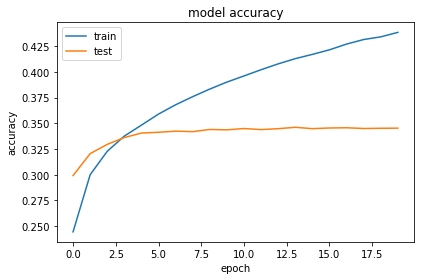

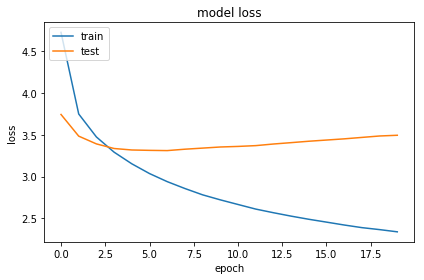

In [77]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig('accuracyVSepoch.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig('lossVSepoch.png')
plt.show()

## 四、 模型评估

In [2]:

from nltk.translate.bleu_score import corpus_bleu


In [3]:
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


In [4]:
def generate_desc(modle, tokenizer , feature , max_len):
    in_text = 'start'
    for i in range(max_len):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen = max_len)
        #feature = feature.reshape((1,4096))
        yhat = model.predict([feature,sequence])
        
        yhat = np.argmax(yhat)
        word = word_for_id(yhat,tokenizer)
        if word is None:
            break;
        in_text += ' '+word
        if word == 'end':
            break;
    return in_text

In [67]:
def evaluate_model(model,d, p_feature, tokenizer, max_len ):
    actual, predicted = [], []
    for key,val in d.items():
        yhat = generate_desc(model, tokenizer ,p_feature[key] ,max_len )
        references = [i.split() for i in val]
        actual.append(references)
        predicted.append(yhat.split())
        
        
        
        
        
    print(predicted)    
#     print('BLEU-1: %f' % corpus_bleu(actual, predicted , weights = (1.0,0,0,0)))
#     print('BLEU-2: %f' % corpus_bleu(actual, predicted , weights = (0.5,0.5,0,0)))
#     print('BLEU-3: %f' % corpus_bleu(actual, predicted , weights = (0.3,0.3,0.3,0)))
#     print('BLEU-4: %f' % corpus_bleu(actual, predicted , weights = (0.25,0.25,0.25,0.25)))
    

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [63]:
model.load_weights('/home/wei/cps_indrnn/0.607_weights-ep008-loss2.932-val_loss3.375.h5')

In [68]:
evaluate_model(model,test_cps, test_feature, tokenizer, max_length)

[['start', 'young', 'boy', 'in', 'red', 'shirt', 'is', 'standing', 'in', 'front', 'of', 'the', 'window', 'end'], ['start', 'boy', 'in', 'red', 'shorts', 'is', 'running', 'on', 'the', 'beach', 'end'], ['start', 'man', 'in', 'red', 'shirt', 'is', 'sitting', 'on', 'the', 'edge', 'of', 'the', 'water', 'end'], ['start', 'dog', 'is', 'running', 'through', 'the', 'snow', 'end'], ['start', 'little', 'boy', 'is', 'playing', 'with', 'red', 'ball', 'in', 'the', 'sand', 'end'], ['start', 'black', 'dog', 'is', 'running', 'through', 'the', 'grass', 'end'], ['start', 'dog', 'is', 'running', 'through', 'the', 'grass', 'end'], ['start', 'young', 'boy', 'with', 'red', 'hair', 'and', 'blue', 'shirt', 'is', 'playing', 'with', 'her', 'head', 'in', 'the', 'air', 'end'], ['start', 'dog', 'is', 'swimming', 'in', 'the', 'water', 'end'], ['start', 'little', 'girl', 'in', 'pink', 'shirt', 'is', 'sitting', 'on', 'bed', 'end'], ['start', 'man', 'in', 'red', 'shirt', 'is', 'sitting', 'on', 'the', 'snow', 'with', 'h

In [79]:
all_weight = glob.glob('/home/wei/cps_LSTM'+'/*h5')    #挑出的所有图片路径

In [80]:
print(all_weight)

['/home/wei/cps_LSTM/weights-ep012-loss2.611-val_loss3.370.h5', '/home/wei/cps_LSTM/weights-ep011-loss2.666-val_loss3.360.h5', '/home/wei/cps_LSTM/weights-ep016-loss2.455-val_loss3.437.h5', '/home/wei/cps_LSTM/weights-ep005-loss3.153-val_loss3.318.h5', '/home/wei/cps_LSTM/weights-ep006-loss3.036-val_loss3.313.h5']


In [135]:
for i in all_weight:
    model.load_weights(i)
    print(i)
    evaluate_model(model,test_cps, test_feature, tokenizer, max_length)

/home/wei/cps_LSTM/weights-ep003-loss2.925-val_loss3.331.h5
BLEU-1: 0.573575
BLEU-2: 0.340746
BLEU-3: 0.250204
BLEU-4: 0.131948
/home/wei/cps_LSTM/weights-ep005-loss2.802-val_loss3.354.h5
BLEU-1: 0.579204
BLEU-2: 0.350087
BLEU-3: 0.259952
BLEU-4: 0.139881
/home/wei/cps_LSTM/weights-ep008-loss2.665-val_loss3.391.h5
BLEU-1: 0.570880
BLEU-2: 0.346048
BLEU-3: 0.256131
BLEU-4: 0.136136
/home/wei/cps_LSTM/weights-ep018-loss2.389-val_loss3.468.h5
BLEU-1: 0.584486
BLEU-2: 0.359893
BLEU-3: 0.266548
BLEU-4: 0.142859
/home/wei/cps_LSTM/weights-ep015-loss2.489-val_loss3.423.h5
BLEU-1: 0.580780
BLEU-2: 0.352869
BLEU-3: 0.259572
BLEU-4: 0.136949
/home/wei/cps_LSTM/weights-ep012-loss2.611-val_loss3.370.h5
BLEU-1: 0.594287
BLEU-2: 0.363665
BLEU-3: 0.270341
BLEU-4: 0.146735
/home/wei/cps_LSTM/weights-ep003-loss3.474-val_loss3.391.h5
BLEU-1: 0.583478
BLEU-2: 0.347178
BLEU-3: 0.254115
BLEU-4: 0.130697
/home/wei/cps_LSTM/weights-ep004-loss3.292-val_loss3.336.h5
BLEU-1: 0.588339
BLEU-2: 0.353181
BLEU-3: 0.

In [76]:
for i in all_weight:
    model.load_weights(i)
    print(i)
    evaluate_model_B(model,test_cps, test_feature, tokenizer, max_length)

/home/wei/cps_indrnn/0.607_weights-ep008-loss2.932-val_loss3.375.h5
BLEU-1: 0.617709
BLEU-2: 0.389866
BLEU-3: 0.296319
BLEU-4: 0.171002
/home/wei/cps_indrnn/0.602_weights-ep005-loss2.956-val_loss3.351.h5
BLEU-1: 0.605572
BLEU-2: 0.380440
BLEU-3: 0.290629
BLEU-4: 0.166904
/home/wei/cps_indrnn/0.6013_weights-ep006-loss3.172-val_loss3.337.h5
BLEU-1: 0.604417
BLEU-2: 0.378805
BLEU-3: 0.284565
BLEU-4: 0.159704
/home/wei/cps_indrnn/weights-ep005-loss3.281-val_loss3.365.h5
BLEU-1: 0.611979
BLEU-2: 0.381329
BLEU-3: 0.287563
BLEU-4: 0.160672


In [58]:
def beam_search_predictions_e(image, beam_index = 3):
   
    start = [tokenizer.word_index['start']]
    start_word = [[start,0.0]]
    
    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            
            par_caps = pad_sequences([s[0]], max_length,padding='post')
            #e = test_feature[image]
            preds = model.predict([image, par_caps])
            
            word_preds = np.argsort(preds[0])[-beam_index:]
            
            # Getting the top <beam_index>(n) predictions and creating a 
            # new list so as to put them via the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        start_word = start_word[-beam_index:]
    
    start_word = start_word[-1][0]
    intermediate_caption = [word_for_id(i, tokenizer) for i in start_word]

    final_caption = []
    
    for i in intermediate_caption:
        if i is None:
            break;
        final_caption.append(i)
        if i == 'end':
            break;
        
    final_caption = ' '.join(final_caption)
    return final_caption

In [75]:
def evaluate_model_B(model,d, p_feature, tokenizer, max_len ):
    actual, predicted = [], []
    for key,val in d.items():
        yhat =  beam_search_predictions_e(p_feature[key], beam_index = 3)
        references = [i.split() for i in val]
        actual.append(references)
        predicted.append(yhat.split())
    print('BLEU-1: %f' % corpus_bleu(actual, predicted , weights = (1.0,0,0,0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted , weights = (0.5,0.5,0,0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted , weights = (0.3,0.3,0.3,0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted , weights = (0.25,0.25,0.25,0.25)))
    

In [66]:
model.load_weights('/home/wei/cps_LSTM/weights-ep006-loss3.036-val_loss3.313.h5')

In [82]:
for i in all_weight:
    model.load_weights(i)
    print(i)
    evaluate_model_B(model,test_cps, test_feature, tokenizer, max_length)

/home/wei/cps_LSTM/weights-ep012-loss2.611-val_loss3.370.h5
BLEU-1: 0.594997
BLEU-2: 0.374169
BLEU-3: 0.284831
BLEU-4: 0.161633
/home/wei/cps_LSTM/weights-ep011-loss2.666-val_loss3.360.h5
BLEU-1: 0.600129
BLEU-2: 0.374908
BLEU-3: 0.283694
BLEU-4: 0.160880
/home/wei/cps_LSTM/weights-ep016-loss2.455-val_loss3.437.h5
BLEU-1: 0.587671
BLEU-2: 0.363704
BLEU-3: 0.275477
BLEU-4: 0.155940
/home/wei/cps_LSTM/weights-ep005-loss3.153-val_loss3.318.h5
BLEU-1: 0.595901
BLEU-2: 0.373092
BLEU-3: 0.283377
BLEU-4: 0.158428
/home/wei/cps_LSTM/weights-ep006-loss3.036-val_loss3.313.h5
BLEU-1: 0.600756
BLEU-2: 0.375863
BLEU-3: 0.287219
BLEU-4: 0.164118


In [155]:
model1 = load_model('model_LSTM_9.h5')
model2 = load_model('model_indrnn_9.h5')

In [91]:
import matplotlib.pyplot as plt
from PIL import Image 
def show_image(image):
    img = Image.open(image_path+'/'+image+'.jpg')
    plt.imshow(img)
    plt.show()

In [92]:
test_list = list(test_id)

In [53]:
def predict_caption(image):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        feature = test_feature[image]
        yhat = model.predict([feature,sequence])
        
        yhat = np.argmax(yhat)
        word = word_for_id(yhat,tokenizer)
        if word is None:
            break;
        in_text += ' '+word
        if word == 'end':
            break;
    return in_text[6:-4]

In [156]:
def predict_caption1(image):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        feature = test_feature[image]
        yhat = model1.predict([feature,sequence])
        
        yhat = np.argmax(yhat)
        word = word_for_id(yhat,tokenizer)
        if word is None:
            break;
        in_text += ' '+word
        if word == 'end':
            break;
    return in_text[6:-4]

In [157]:
def predict_caption2(image):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        feature = test_feature[image]
        yhat = model2.predict([feature,sequence])
        
        yhat = np.argmax(yhat)
        word = word_for_id(yhat,tokenizer)
        if word is None:
            break;
        in_text += ' '+word
        if word == 'end':
            break;
    return in_text[6:-4]

In [86]:
tokenizer.word_index['start']

2

In [103]:
model.load_weights('/home/wei/cps_LSTM/weights-ep006-loss3.036-val_loss3.313.h5')
model1 = model

In [106]:
model.load_weights('/home/wei/cps_indrnn/0.607_weights-ep008-loss2.932-val_loss3.375.h5')
model2 = model

263854883_0f320c1562


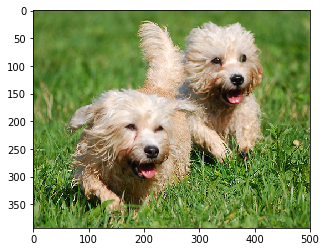

start white dog is running through the grass end
start white dog is running through the grass end
2288099178_41091aa00c


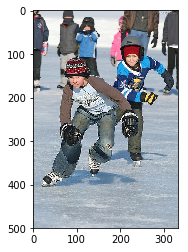

start young boy in red and red shorts is playing in the snow end
start the hockey player in the red and white helmet is in the middle of the ice end
2343525685_3eba3b6686


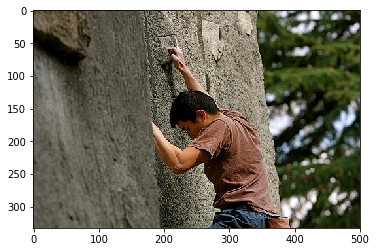

start young boy is climbing up rock end
start young boy in red shirt is climbing rock wall end
3017521547_f5ef8848e3


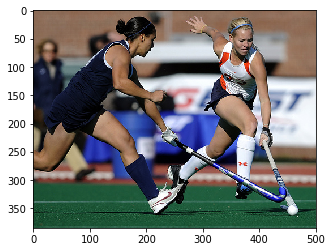

start young boy wearing red shirt is running through the grass end
start boy in red shirt is running on the field end
3310067561_b92017acab


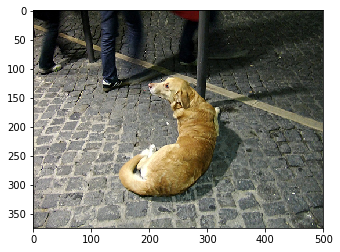

start brown dog is playing in the sand end
start brown dog is standing in the snow end
400851260_5911898657


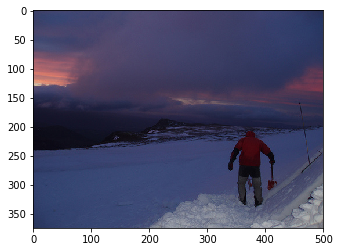

start two people are standing on snow covered mountain end
start two people are standing on snowy mountain end
3030566410_393c36a6c5


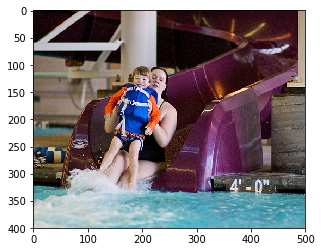

start young boy is jumping into pool end
start young boy is jumping into pool end
1714316707_8bbaa2a2ba


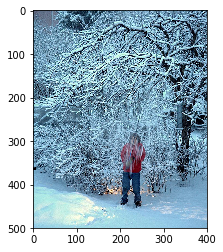

start group of people are standing in front of snowy mountain end
start two children are playing in the snow end
3397220683_4aca010f86


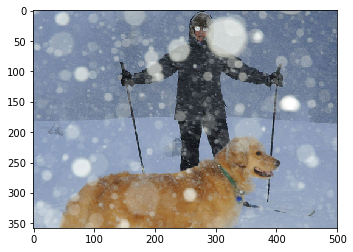

start two dogs play in the snow end
start two dogs play in the snow end
2647049174_0fb47cee2e


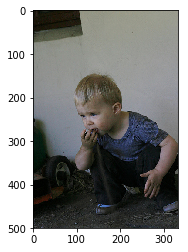

start little boy is laying on the bed end
start little boy is sitting on the bed end


In [115]:
for i in range(10):
    cs = test_list[70+i]
    print(cs)
    show_image(cs)
    p1 = beam_search_predictions(model1,cs, beam_index = 3)
    p2 = beam_search_predictions(model2,cs, beam_index = 3)
   # print(p1)
    print(p1)
    print(p2)

In [107]:
def beam_search_predictions(Model,image, beam_index = 3):
   
    start = [tokenizer.word_index['start']]
    start_word = [[start,0.0]]
    
    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            
            par_caps = pad_sequences([s[0]], max_length,padding='post')
            e = test_feature[image]
            preds = Model.predict([e, par_caps])
            
            word_preds = np.argsort(preds[0])[-beam_index:]
            
            # Getting the top <beam_index>(n) predictions and creating a 
            # new list so as to put them via the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        start_word = start_word[-beam_index:]
    
    start_word = start_word[-1][0]
    intermediate_caption = [word_for_id(i, tokenizer) for i in start_word]

    final_caption = []
    
    for i in intermediate_caption:
        if i is None:
            break;
        final_caption.append(i)
        if i == 'end':
            break;
        
    final_caption = ' '.join(final_caption)
    return final_caption

In [98]:
def beam_search_predictions_I(image, beam_index = 3):
   
    start = [tokenizer.word_index['start']]
    start_word = [[start,0.0]]
    
    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            
            par_caps = pad_sequences([s[0]], max_length,padding='post')
            e = test_feature[image]
            preds = model2.predict([e, par_caps])
            
            word_preds = np.argsort(preds[0])[-beam_index:]
            
            # Getting the top <beam_index>(n) predictions and creating a 
            # new list so as to put them via the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        start_word = start_word[-beam_index:]
    
    start_word = start_word[-1][0]
    intermediate_caption = [word_for_id(i, tokenizer) for i in start_word]

    final_caption = []
    
    for i in intermediate_caption:
        if i is None:
            break;
        final_caption.append(i)
        if i == 'end':
            break;
        
    final_caption = ' '.join(final_caption)
    return final_caption

In [ ]:
a = [2,3,6,4]
2 in a